## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Listings Dataset - Cleaning/Preparation
*By Christine Kim*

In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

listings = pd.read_csv('listings.csv')

In [58]:
# Selecting columns
listings_cleaned = listings.loc[:,['id', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates', 'amenities', 'price', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_identity_verified', 'host_location', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

# Dropping missing values - rationale explained in report
listings_dropped = listings_cleaned.dropna()
listings_dropped.head()
missing_values_listings = listings_cleaned.loc[~listings_cleaned.id.isin(listings_dropped.id), :]

# Convert the string representation of lists into actual lists
listings_amenities = listings_dropped.copy()
listings_amenities['amenities'] = listings_amenities['amenities'].apply(lambda x: x.strip('[]').replace('"', '').split(', '))

# Get the unique list of amenities across all listings
all_amenities = set([amenity for sublist in listings_amenities['amenities'] for amenity in sublist])

# Create binary columns for each amenity
for amenity in all_amenities:
    listings_amenities[amenity] = listings_amenities['amenities'].apply(lambda x: 1 if amenity in x else 0)

listings_amenities = listings_amenities.drop('amenities', axis=1)
listings_noamen = listings_dropped.drop('amenities', axis=1)

In [59]:
amenities_cat = listings_amenities.iloc[:,19:]
amenities_cat.columns = amenities_cat.columns.str.lower()

In [60]:
# Categorizing amenities

# Listing keywords for each category
wifi_keywords = ['wifi']
bathroom_keywords = ['shampoo', 'body', 'conditioner', 'soap', 'shower gel', 'hair dryer']
kitchen_keywords = ['dining', 'fridge', 'oven', 'refrigerator', 'microwave', 'stove', 'blender', 'rice maker', 
                    'bread maker', 'french press', 'nespresso', 'kitchen', 'dishwasher', 'coffee', 
                    'baking', 'cooking', 'dishes', 'kettle', 'silverware', 'toaster', 'freezer', 'glasses']
leisure_keywords = ['chromecast', 'ping pong', 'piano', 'cable', 'video', 'ethernet', 'roku', 'hbo max', 'disney+',
                    'netflix', 'hulu', 'tv', 'games', 'game', 'books', 'sound', 'dvd', 'record player']
laundry_keywords = ['laundromat', 'washer', 'dryer', 'hangers', 'iron', 'clothing']
storage_keywords = ['closet', 'dresser', 'storage', 'wardrobe']
transportation_keywords = ['parking', 'garage', 'ev charger']
environment_keywords = ['mosquito net', 'heater', 'heated', 'heating', 'ac unit', 'ac - ', 'fan', 'fans', 'shades', 'fireplace', 'air conditioning']
safety_keywords = ['first aid','alarm', 'extinguisher','guard', 'safe', 'lock', 'keypad', 
                   'security camera', 'outlet covers']
exercise_keywords = ['bikes', 'yoga mat', 'gym', 'exercise', 'stationary bike', 'treadmill', 'weights']
views_keywords = ['view', 'waterfront', 'lake access', 'beach access', 'resort access']
outdoor_keywords = ['barbecue', 'sun lounger', 'hammock', 'outdoor', 'patio', 'yard', 'fire pit', 'grill', 'beach']
luxury_keywords = ['bidet', 'hot tub', 'bathtub', 'pool', 'sauna', 'rooftop']
family_keywords =  ['crib', 'baby', 'children', 'changing table', 'high chair']
bedroom_keywords = ['blankets', 'pllows', 'linen']
pet_keywords = ['pet']
convenience_keywords = ['self check-in', 'luggage', 'elevator']
cleaning_keywords = ['cleaning products', 'trash']
service_cols = ['cleaning available', 'breakfast', 'host greets you', 'building staff']
smoking_keywords = ['smoking']
work_keywords = ['workspace']

def categorize_amenities(df, keywords, category_name):
    cols = [col for col in df.columns if any(keyword in col for keyword in keywords)]
    if cols:
        df[category_name] = df[cols].any(axis=1).astype(int)
        
        # Ensuring the new category column is not in the list of columns to drop
        cols_to_drop = [col for col in cols if col != category_name]
        
        df.drop(columns=cols_to_drop, inplace=True)


# Using defined function to categorize amenities
categorize_amenities(amenities_cat, wifi_keywords, 'wifi_amenities')
categorize_amenities(amenities_cat, bathroom_keywords, 'bathroom_amenities')
categorize_amenities(amenities_cat, kitchen_keywords, 'kitchen_amenities')
categorize_amenities(amenities_cat, leisure_keywords, 'leisure_amenities')
categorize_amenities(amenities_cat, laundry_keywords, 'laundry_amenities')
categorize_amenities(amenities_cat, storage_keywords, 'storage_amenities')
categorize_amenities(amenities_cat, transportation_keywords, 'transporation_amenities')
categorize_amenities(amenities_cat, environment_keywords, 'environment_amenities')
categorize_amenities(amenities_cat, safety_keywords, 'safety_amenities')
categorize_amenities(amenities_cat, exercise_keywords, 'exercise_amenities')
categorize_amenities(amenities_cat, views_keywords, 'views_amenities')
categorize_amenities(amenities_cat, outdoor_keywords, 'outdoor_amenities')
categorize_amenities(amenities_cat, luxury_keywords, 'luxury_amenities')
categorize_amenities(amenities_cat, family_keywords, 'family_amenities')
categorize_amenities(amenities_cat, bedroom_keywords, 'bedroom_amenities')
categorize_amenities(amenities_cat, pet_keywords, 'pet_amenities')
categorize_amenities(amenities_cat, convenience_keywords, 'convenience_amenities')
categorize_amenities(amenities_cat, cleaning_keywords, 'cleaning_amenities')
categorize_amenities(amenities_cat, service_cols, 'service_amenities')
categorize_amenities(amenities_cat, smoking_keywords, 'smoking_amenities')
categorize_amenities(amenities_cat, work_keywords, 'work_amenities')

# Adding amenity categories columns to listings dataset
listings_data = pd.concat([listings_noamen, amenities_cat], axis=1)
listings_data.head()

,id,host_id,neighbourhood_cleansed,latitude,longitude,accommodates,price,host_response_time,host_response_rate,host_is_superhost,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
0,2384.0,2613,Hyde Park,41.787900,-87.587800,1,$114.00,within an hour,100%,t,...,0,1,0,1,0,0,1,1,0,1
1,7126.0,17928,West Town,41.901660,-87.680210,2,$92.00,within an hour,100%,t,...,0,1,0,1,0,1,0,0,0,1
2,10945.0,33004,Lincoln Park,41.911960,-87.639810,4,$170.00,within an hour,93%,t,...,1,1,1,1,0,1,0,0,0,0
4,24833.0,101521,Lincoln Park,41.925961,-87.656364,3,$61.00,within a few hours,94%,t,...,1,1,1,1,1,1,1,0,0,1
5,25879.0,101521,Lincoln Park,41.924990,-87.655730,6,$95.00,within a few hours,94%,t,...,1,0,1,0,1,1,0,0,0,1


In [61]:
# Removing not meaningful amenities
irrelevant_amenities = ['essentials', 'hot water', 'long term stays allowed', 'private entrance', 'single level home', 'private living room']
listings_data_filtered = listings_data.drop(irrelevant_amenities, axis=1)

amenity_counts = amenities_cat.sum(axis=0)

notmeaningful_amenities = amenity_counts[amenity_counts <= 60].index.tolist()
listings_data_filtered = listings_data_filtered.drop(notmeaningful_amenities, axis=1)
listings_data_filtered.head()

,id,host_id,neighbourhood_cleansed,latitude,longitude,accommodates,price,host_response_time,host_response_rate,host_is_superhost,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
0,2384.0,2613,Hyde Park,41.787900,-87.587800,1,$114.00,within an hour,100%,t,...,0,1,0,1,0,0,1,1,0,1
1,7126.0,17928,West Town,41.901660,-87.680210,2,$92.00,within an hour,100%,t,...,0,1,0,1,0,1,0,0,0,1
2,10945.0,33004,Lincoln Park,41.911960,-87.639810,4,$170.00,within an hour,93%,t,...,1,1,1,1,0,1,0,0,0,0
4,24833.0,101521,Lincoln Park,41.925961,-87.656364,3,$61.00,within a few hours,94%,t,...,1,1,1,1,1,1,1,0,0,1
5,25879.0,101521,Lincoln Park,41.924990,-87.655730,6,$95.00,within a few hours,94%,t,...,1,0,1,0,1,1,0,0,0,1


Chose 60 as the threshold since the data has around ~6000 rows. Meaningful amenity if 1% of listed properties have it.

In [62]:
# Summary Statistics
listings_data_filtered['price'] = pd.to_numeric(listings_data_filtered['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
listings_data_filtered['host_response_rate'] = pd.to_numeric(listings_data_filtered['host_response_rate'].str.replace('%', '').str.replace(',', ''), errors='coerce')

listings_data_filtered.describe()

,id,host_id,latitude,longitude,accommodates,price,host_response_rate,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
count,5.050000e+03,5.050000e+03,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,...,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,3.010966e+17,1.472118e+08,41.897704,-87.666005,4.454851,181.431881,98.177426,4.763786,4.807012,4.757745,...,0.612475,0.562772,0.330495,0.827327,0.281980,0.872277,0.517426,0.228317,0.024554,0.663168
std,3.788665e+17,1.520425e+08,0.062416,0.044503,3.035285,206.919906,8.874949,0.373710,0.333659,0.379777,...,0.487233,0.496093,0.470438,0.378002,0.450008,0.333814,0.499746,0.419789,0.154778,0.472674
min,2.384000e+03,2.153000e+03,41.650640,-87.847160,1.000000,12.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.037353e+07,2.507408e+07,41.867065,-87.690289,2.000000,86.000000,100.000000,4.700000,4.760000,4.690000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.975299e+07,9.673061e+07,41.901555,-87.662915,4.000000,132.000000,100.000000,4.860000,4.900000,4.860000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,7.022372e+17,2.265829e+08,41.940460,-87.634164,6.000000,213.000000,100.000000,4.970000,4.980000,4.980000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,9.730150e+17,5.318826e+08,42.022200,-87.536550,16.000000,7585.000000,100.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
listings_data_filtered.to_csv('listings_filtered.csv', index=False)

### Calendar Dataset - Cleaning/Preparation
*By Christine Kim*

In [64]:
# Quarterly Calendar data
calendar_december = pd.read_csv('calendar_December.csv')
calendar_march = pd.read_csv('calendar_March.csv')
calendar_june = pd.read_csv('calendar_June.csv')
calendar_september = pd.read_csv('calendar_September.csv')

# Convert to datetime
calendar_december['date'] = pd.to_datetime(calendar_december['date'])
calendar_march['date'] = pd.to_datetime(calendar_march['date'])
calendar_june['date'] = pd.to_datetime(calendar_june['date'])
calendar_september['date'] = pd.to_datetime(calendar_september['date'])

# Finding listings that included in all four quarters
common_listing_ids = set(calendar_december['listing_id']).intersection(calendar_march['listing_id'], calendar_june['listing_id'], calendar_september['listing_id'])
calendar_december = calendar_december[calendar_december['listing_id'].isin(common_listing_ids)]
calendar_march = calendar_march[calendar_march['listing_id'].isin(common_listing_ids)]
calendar_june = calendar_june[calendar_june['listing_id'].isin(common_listing_ids)]
calendar_september = calendar_september[calendar_september['listing_id'].isin(common_listing_ids)]

# Removing overlapping dates
calendar_december = calendar_december.loc[calendar_december['date']<'2023-03-19',:]
calendar_march = calendar_march.loc[calendar_march['date']<'2023-06-18',:]
calendar_june = calendar_june.loc[calendar_june['date']<'2023-09-12',:]
calendar_september = calendar_september.loc[calendar_september['date']<'2023-12-20',:]

# Concatenating quarterly data for yearly calendar data
calendar_year = pd.concat([calendar_december,calendar_march,calendar_june,calendar_september])
calendar_year.sort_values(by=['listing_id', 'date'], inplace=True)
calendar_year = calendar_year.drop(['minimum_nights', 'maximum_nights'], axis=1)

In [65]:
calendar_year['price'] = pd.to_numeric(calendar_year['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
calendar_year['year'] = calendar_year['date'].dt.year
calendar_year['month'] = calendar_year['date'].dt.month
calendar_year = calendar_year.drop('available', axis=1)
calendar_year.head()

,listing_id,date,price,adjusted_price,year,month
0,2384,2022-12-20,80.0,$80.00,2022,12
1,2384,2022-12-21,80.0,$80.00,2022,12
2,2384,2022-12-22,80.0,$80.00,2022,12
3,2384,2022-12-23,95.0,$95.00,2022,12
4,2384,2022-12-24,95.0,$95.00,2022,12


In [66]:
calendar_year.to_csv('calendar_year.csv', index=False)

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis 1
*By \<Name of person doing the analysis>*

### Analysis 2
*By Christine Kim*

In [68]:
listings = pd.read_csv('listings_filtered.csv')

In [69]:
# Removing price outliers
q1 = np.percentile(listings['price'],25)
q3 = np.percentile(listings['price'],75)
intQ_range = q3-q1

#Tukey's fences
Lower_fence = q1 - 1.5*intQ_range
Upper_fence = q3 + 1.5*intQ_range

Outlying_obs = listings[(listings.price<Lower_fence) | (listings.price>Upper_fence)]
Outlying_obs

listings_nooutlier = listings.drop(Outlying_obs.index)
listings_nooutlier.describe()
listings_nooutlier.columns

Index(['id', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'accommodates', 'price', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_identity_verified', 'host_location',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'wifi_amenities', 'bathroom_amenities',
       'kitchen_amenities', 'leisure_amenities', 'laundry_amenities',
       'storage_amenities', 'transporation_amenities', 'environment_amenities',
       'safety_amenities', 'exercise_amenities', 'views_amenities',
       'outdoor_amenities', 'luxury_amenities', 'family_amenities',
       'bedroom_amenities', 'pet_amenities', 'convenience_amenities',
       'cleaning_amenities', 'service_amenities', 'smoking_amenities',
       'work_amenities'],
      dtype='object')

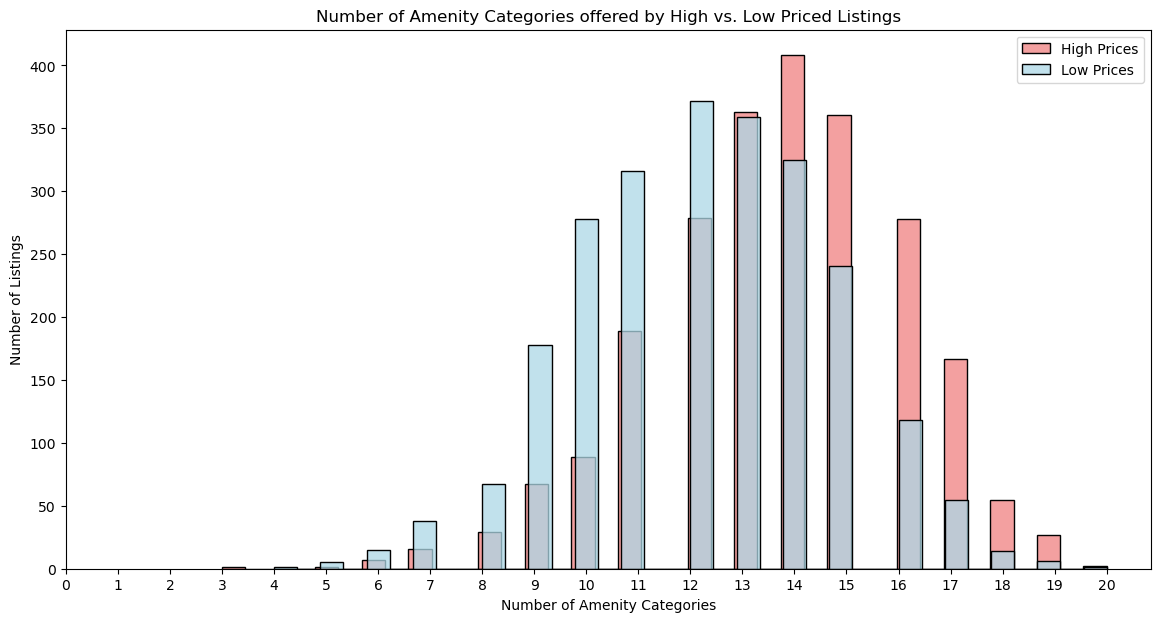

In [70]:
## Visualization 1: Prevalence of each amenity category

median_price_threshold = listings_nooutlier['price'].quantile(0.5)

listings_nooutlier['amenity_count'] = listings_nooutlier.iloc[:, listings_nooutlier.columns.get_loc('wifi_amenities'):listings_nooutlier.columns.get_loc('work_amenities') + 1].sum(axis=1)

# Bin into high and low prices
high_prices = listings_nooutlier[listings_nooutlier['price'] > median_price_threshold]['amenity_count']
low_prices = listings_nooutlier[listings_nooutlier['price'] <= median_price_threshold]['amenity_count']

plt.figure(figsize=(14, 7))
ax1 = sns.histplot(high_prices, color="lightcoral", label='High Prices', kde=False)
ax2 = sns.histplot(low_prices, color="lightblue", label='Low Prices', kde=False)
plt.xlabel('Number of Amenity Categories')
plt.ylabel('Number of Listings')
ax1.set_xticks(np.arange(0,21,1))
plt.title('Number of Amenity Categories offered by High vs. Low Priced Listings')
plt.legend()
plt.show()

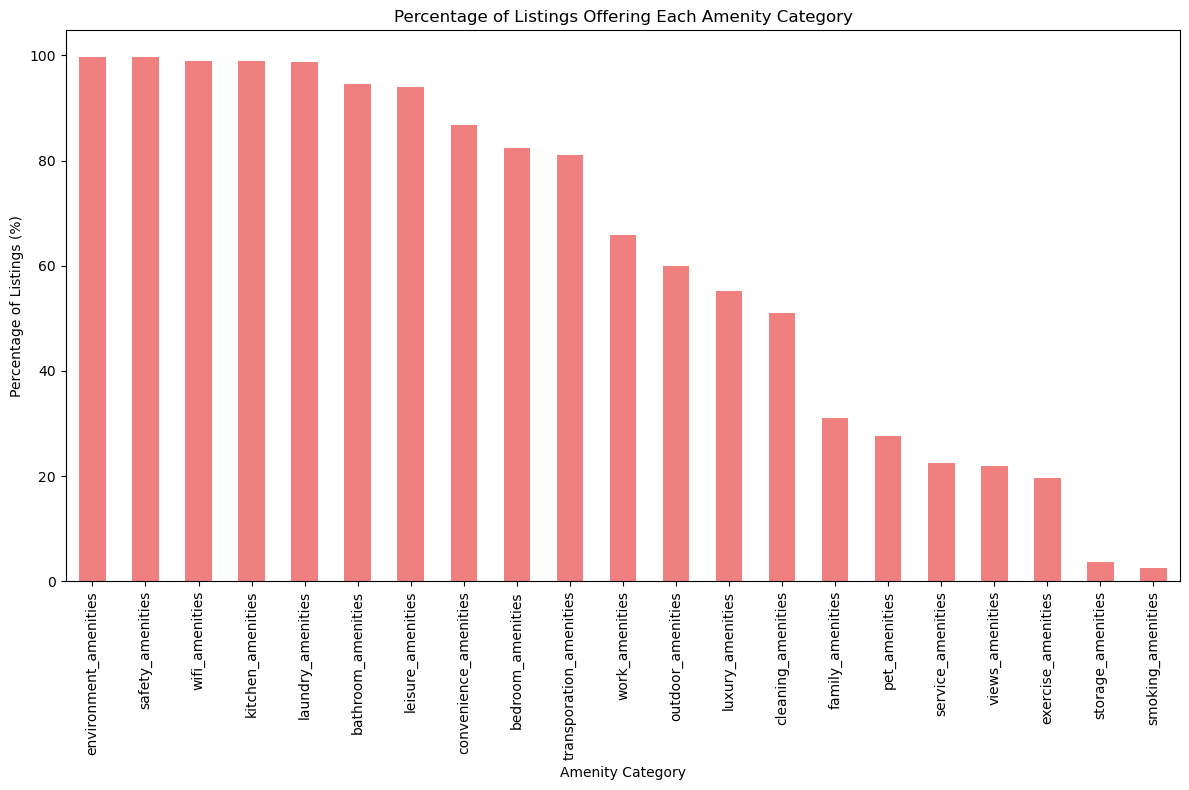

In [71]:
## Visualization 2: Prevalence of each amenity category

amenities_count = listings_nooutlier.iloc[:, listings_nooutlier.columns.get_loc('wifi_amenities'):listings_nooutlier.columns.get_loc('work_amenities') + 1].sum().sort_values(ascending=False)

amenity_categories = list(amenities_count.index)

percentages = listings_nooutlier[amenity_categories].mean() * 100
sorted_percentages = percentages.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sorted_percentages.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Listings Offering Each Amenity Category')
plt.xlabel('Amenity Category')
plt.ylabel('Percentage of Listings (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

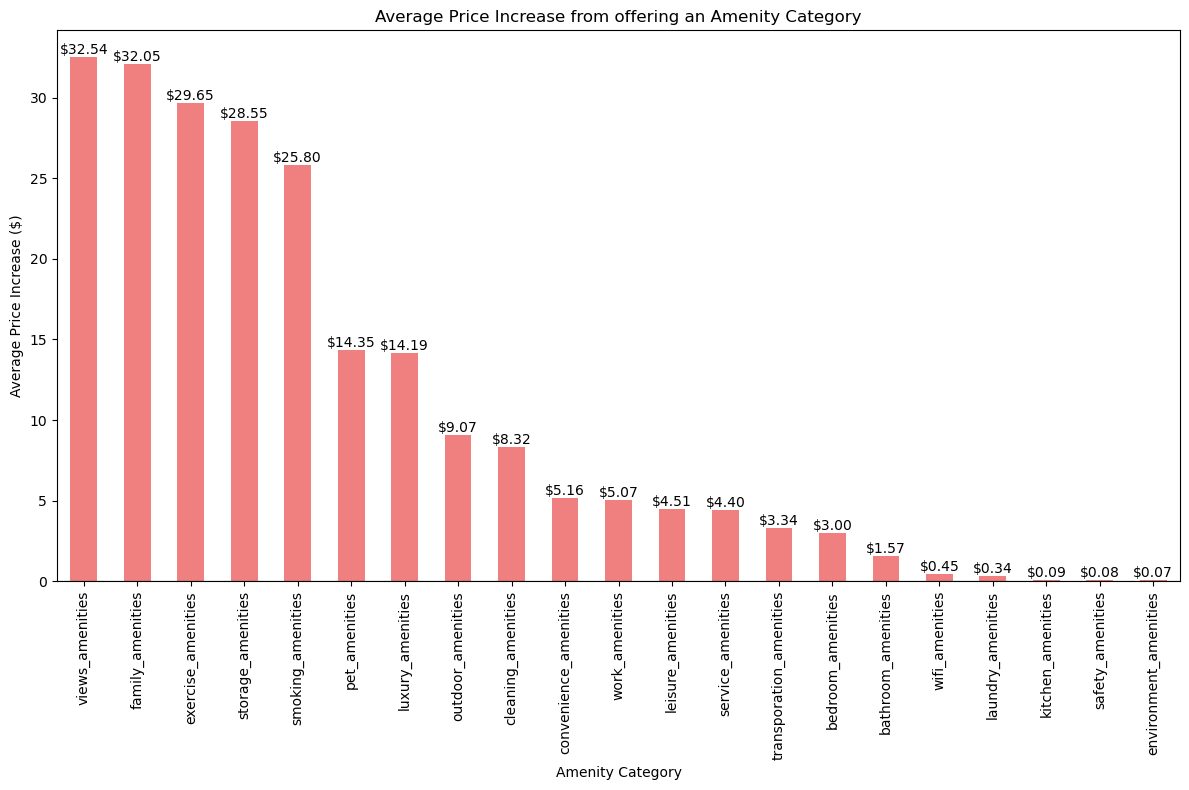

In [72]:
## Visualization 3: Prevalence of each amenity category

overall_average_price = listings_nooutlier['price'].mean()

# Dictionary to store the price differential for each amenity
price_differential = {}

# Iterate over each amenity category to calculate the average price and price differential
for amenity_category in amenity_categories:
    has_amenity = listings_nooutlier[listings_nooutlier[amenity_category] == 1]['price'].mean()
    price_differential[amenity_category] = has_amenity - overall_average_price

sorted_differential = pd.Series(price_differential).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sorted_differential.plot(kind='bar', color='lightcoral', ax=ax)
ax.set_title('Average Price Increase from offering an Amenity Category')
ax.set_xlabel('Amenity Category')
ax.set_ylabel('Average Price Increase ($)')
ax.axhline(0, color='black', linewidth=0.8)

# Annotate bars with the value of the price differential
for i, v in enumerate(sorted_differential):
    ax.text(i, v if v > 0 else 0, f"${v:.2f}", color='black', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Analysis 3
*By \<Name of person doing the analysis>*

### Analysis 4
*By Christine Lee*

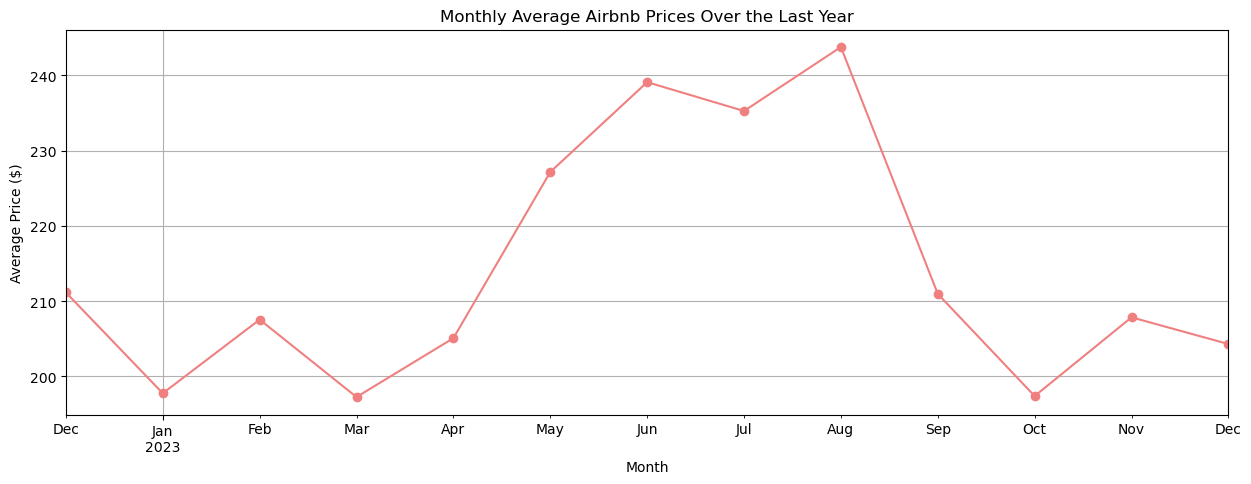

In [75]:
## Visualization 1: Monthly Average Airbnb Prices Over the Last Year

# Filter data to only include the last year
one_year_ago = pd.Timestamp('2023-09-12') - pd.DateOffset(years=1)
last_year_data = calendar_year[calendar_year['date'] >= one_year_ago]

# Group by month and calculate the average price for each month
last_year_data['month'] = last_year_data['date'].dt.to_period('M')
monthly_prices = last_year_data.groupby('month')['price'].mean()

# Plotting the line graph
plt.figure(figsize=(15, 5))
monthly_prices.plot(kind='line', color='lightcoral', marker='o', linestyle='-')
plt.title('Monthly Average Airbnb Prices Over the Last Year')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.grid(True)

plt.show()

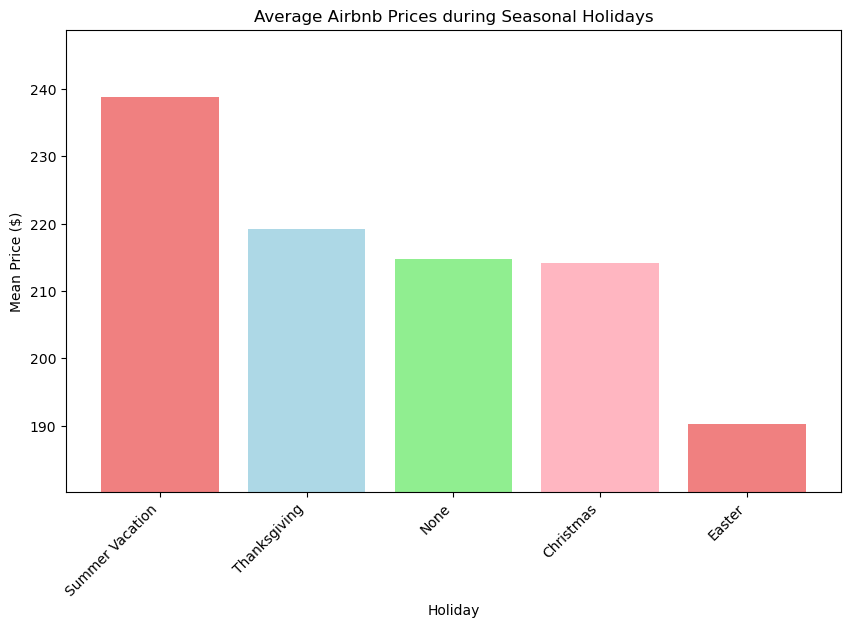

In [77]:
## Visualization 2: Average Airbnb Prices during Seasonal Holidays

# Convert 'date' column to datetime type
last_year_data['date'] = pd.to_datetime(last_year_data['date'])

# Extract month and day to identify holidays
last_year_data['month_day'] = last_year_data['date'].dt.strftime('%m-%d')

# Define holiday periods
holidays = {
    'Easter': ['04-04', '04-05', '04-06'],
    'Summer Vacation': ['06-01', '08-31'],
    'Thanksgiving': ['11-25', '11-26', '11-27'],
    'Christmas': ['12-24', '12-25', '12-26']

}

# Create a new column 'holiday' to label each day
last_year_data['holiday'] = 'None'
for holiday, dates in holidays.items():
    last_year_data.loc[last_year_data['month_day'].isin(dates), 'holiday'] = holiday

# Group by holiday and calculate the mean price
holiday_prices = last_year_data.groupby('holiday')['price'].mean().reset_index()

# Sort holidays by their mean prices
holiday_prices = holiday_prices.sort_values(by='price', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(holiday_prices['holiday'], holiday_prices['price'], color=colors)
plt.title('Average Airbnb Prices during Seasonal Holidays')
plt.xlabel('Holiday')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45, ha='right')


# Set y-axis range to highlight variability
plt.ylim(min(holiday_prices['price']) - 10, max(holiday_prices['price']) + 10)

plt.show()

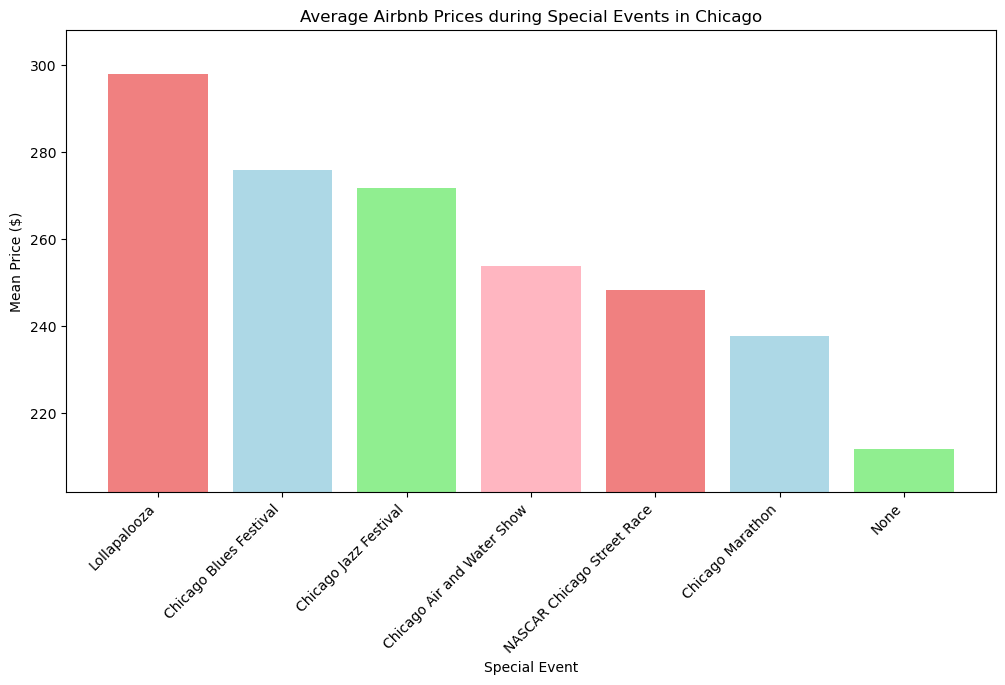

In [78]:
## Visualization 3: Average Airbnb Prices during Special Events in Chicago

# Define special events and their date ranges
events = {
    'Chicago Marathon': ['2023-10-08'],
    'Chicago Blues Festival': ['2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11'],
    'Lollapalooza': ['2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06'],
    'Chicago Jazz Festival': ['2023-08-31', '2023-09-01', '2023-09-02', '2023-09-03'],
    'Chicago Air and Water Show': ['2023-08-19', '2023-08-20'],
    'NASCAR Chicago Street Race': ['2023-7-1', '2023-7-2']
}

# Create a new column 'event' to label each day
last_year_data['event'] = 'None'
for event, dates in events.items():
    last_year_data.loc[last_year_data['date'].isin(dates), 'event'] = event

# Group by event and calculate the mean price
event_prices = last_year_data.groupby('event')['price'].mean().reset_index()

# Sort events by their mean prices
event_prices = event_prices.sort_values(by='price', ascending=False)

# Define different colors for each holiday
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightpink']

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(event_prices['event'], event_prices['price'], color=colors)
plt.title('Average Airbnb Prices during Special Events in Chicago')
plt.xlabel('Special Event')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45, ha='right')

# Set y-axis range to highlight variability
plt.ylim(min(event_prices['price']) - 10, max(event_prices['price']) + 10)

plt.show()

## Other sections

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.